# A step-by-step guide to perform hydorlogical data assimilation with PyGLDA toolbox
---
Edited by Fan Yang (fany@plan.aau.dk) and all other members from AAU geodesy group. This document is dedicated to the summer school held by Geodesy Group, Aalborg University, Denmark. This can be used as a quick start of the PyGLDA toolbox.

**Notice**: please makre sure that this notebook is opened under the environment of **pyglda**, following these steps: navigate to the '../PyGLDA/demo/..', open a terminal and type
> conda activate pyglda
> 
> pip install jupyterlab
> 
> jupiter lab

---

## 1. Test of installation
First of all, run this initial test to ensure that PyGLDA has been correctly configured and installed on your platform (windows and linux). Please find the detailed installation guide line in our Github reposirtoy ==> https://github.com/AAUGeodesyGroup/PyGLDA

In [21]:
!mpiexec -n 11 python -u demo_test_installation.py


Start to perturb GRACE to obtain appropriate observations...
Finished: 2025-08-18 15:19:05

Preparing OBS design matrix: 2025-08-18 15:19:06
Successfully generate and save the design matrix...

Configure DA experiments: 2025-08-18 15:19:07

Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [31.2, 21.8], lon- [87.8, 97.7]
Forcing field: ERA5

Initializing model states: resume
Configure shapefile: 2025-08-18 15:19:07
Configure OBS and its design matrix: 2025-08-18 15:19:08
User case: Guide

=====================Data assimilation=========================

Doing year/month: 2005/02
............................|
Doing year/month: 2005/03
...............................|
Doing year/month: 2005/04
..............................|
Doing year/month: 2005/05
...............................|
Doing year/month: 2005/06
..............................|
Doing year/month: 2005/07
...............................|
Doing year/month: 2005/08
...............................|
Doing year/month: 2005/09


---

## 2 Pre-setup

### 2.1 Define the study area of interest
To define the study area, you should first have a shapefile of that region and and specify the path of this shapefile to be recoginized by PyGLDA.

In [22]:
from demo_summer_school import RDA
RDA.basin = 'Brahmaputra3subbasins'
RDA.shp_path = '../data/basin/shp/Brahmaputra/Brahmaputra3subbasins_subbasins.shp'

Then, visualize the shape file as follows

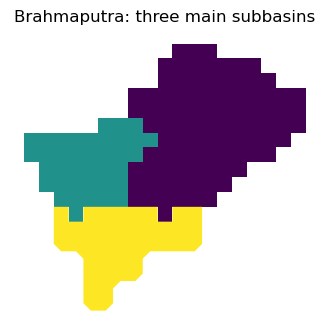

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
basin_map = gpd.read_file(RDA.shp_path)
fig, ax = plt.subplots(figsize = (4,4))
basin_map.plot(ax=ax,column="ID")
ax.set_axis_off()
ax.set_title('Brahmaputra: three main subbasins');

All standard shapefiles are acceptable for PyGLDA. But be aware to follow the convention of provided example shapefile to edit your own shapefile: use the feature 'ID' to specify the subbasins. 

### 2.2 Customize the configuration
In addition to the study region, you still have many other relevant parameters to define.

Define where to store the key results of DA

In [24]:
from demo_summer_school import mm
mm.res_output = '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/res'
mm.figure_output = '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/figure'

Define the path of external data

In [25]:
RDA.external_data_path = '/media/user/My Book/Fan/SummerSchool/External Data'

Define the name of this case study

In [26]:
RDA.case = 'Guide'

Define the path of desired setting files

In [27]:
RDA.setting_dir = '../settings/SummerSchool/Installation_guide'

Define the ensemble size for OL and DA

In [28]:
RDA.ens = 10

Define the time period of spin up

In [29]:
RDA.cold_begin_time = '2004-10-01'
RDA.cold_end_time = '2004-12-31'

Define the time period of OL

In [30]:
RDA.warm_begin_time = '2005-01-01'
RDA.warm_end_time = '2005-12-31'

Define the time period of DA

In [31]:
RDA.resume_begin_time = '2005-02-01'
RDA.resume_end_time = '2005-12-31'

Save the configuration for later use

In [32]:
from demo_summer_school import save_main_configuration_parameters
save_main_configuration_parameters()

{'basin': 'Brahmaputra3subbasins',
 'shp_path': '../data/basin/shp/Brahmaputra/Brahmaputra3subbasins_subbasins.shp',
 'case': 'Guide',
 'setting_dir': '../settings/SummerSchool/Installation_guide',
 'ens': 10,
 'cold_begin_time': '2004-10-01',
 'cold_end_time': '2004-12-31',
 'warm_begin_time': '2005-01-01',
 'warm_end_time': '2005-12-31',
 'resume_begin_time': '2005-02-01',
 'resume_end_time': '2005-12-31',
 'external_data_path': '/media/user/My Book/Fan/SummerSchool/External Data',
 'res_output': '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/res',
 'figure_output': '/media/user/My Book/Fan/SummerSchool/External Data/w3ra/figure'}

---
## 3 Data preparation

### 3.1 GRACE mascon observation
According to the predefined basin shapefile and time period, we obtain the (1) basin-average GRACE-TWS, (2) basin-average GRACE covariance matrix, (3) 0.5-degree gridded GRACE-TWS. By default, GRACE-Mascon, which comes from the CSR solution (https://www2.csr.utexas.edu/grace/RL06_mascons.html), is used to produce TWS observations. However, one can also swicth to GRACE spherical harmonic solution, which will be demonstrated later on.

In [33]:
from demo_summer_school import demo_prepare_GRACE_Mascon
demo_prepare_GRACE_Mascon(isDiagonal=False)

Start to pre-process GRACE to obtain basin-wise TWS over places of interest...
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-18 15:19:27
Start to pre-process GRACE to obtain grid-wise TWS over places of interest...
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-18 15:19:28

Start to pre-process GRACE to obtain COV over places of interest...
2005-01_0.npy
2005-02_0.npy
2005-03_0.npy
2005-04_0.npy
2005-05_0.npy
2005-06_0.npy
2005-07_0.npy
2005-08_0.npy
2005-09_0.npy
2005-10_0.npy
2005-11_0.npy
2005-12_0.npy
Finished: 2025-08-18 15:21:00


### 3.2 Forcing field
The global 0.1 degree meterological forcing field has been downloaded, and what to do is to crop the global data to the study area. **Notice: This is only available for Linux, since the cropping tool called 'metview' is not available at windows operating system! Windows user can simply skip this step, since the cropped data has been pre-saved for demonstration.** 

In [34]:
RDA.prepare_Forcing()


Data preparation...
2004-10
2004-11
2004-12
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-18 15:23:46


---
## 4 Model spin-up 
This is to warm up the model to make it reach equillbrium at given epoch.

In [35]:
RDA.single_run()


Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [31.2, 21.8], lon- [87.8, 97.7]
Forcing field: ERA5

Initializing model states: cold
Guess cold states.
Spin up run for 2004-10-01 to 2004-12-31 (92 days)

===== RUN from 2004-10-01 to 2004-12-31 =====

Doing year/month 200410
...............................
Doing year/month 200411
..............................
Doing year/month 200412
...............................
Finished

Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [31.2, 21.8], lon- [87.8, 97.7]
Forcing field: ERA5


---
## 5 Open loop (OL)
This uses ensemble to perform the OL for two goals: (1) generate perturbation at initial epoch; (2) acquire ensemble mean of the temporal mean to be added to GRACE TWS anomaly to generate the real observations. Pertubations are generated according to the predefined setting file. **Notice: please make sure that the number of running threads equals the ensemble size plus 1.**  

In [36]:
!mpiexec -n 11 python -u demo_summer_school.py OL


Start to generate ensembles with given perturbation...
2005-01
2005-02
2005-03
2005-04
2005-05
2005-06
2005-07
2005-08
2005-09
2005-10
2005-11
2005-12
Finished: 2025-08-18 15:23:49

Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [31.2, 21.8], lon- [87.8, 97.7]
Forcing field: ERA5

Initializing model states: warm

===== RUN from 2005-01-01 to 2005-12-31 =====

Doing year/month 200501
...............................
Doing year/month 200502
............................
Doing year/month 200503
...............................
Doing year/month 200504
..............................
Doing year/month 200505
...............................
Doing year/month 200506
..............................
Doing year/month 200507
...............................
Doing year/month 200508
...............................
Doing year/month 200509
..............................
Doing year/month 200510
...............................
Doing year/month 200511
..............................
Doing year/month 20

---
## 6 Data assimilation (DA)

In [37]:
!mpiexec -n 11 python -u demo_summer_school.py DA


Start to perturb GRACE to obtain appropriate observations...
Finished: 2025-08-18 15:24:30

Preparing OBS design matrix: 2025-08-18 15:24:31
Successfully generate and save the design matrix...

Configure DA experiments: 2025-08-18 15:24:31

Configuring W3v2 run
Spatial resolution: 0.1
Area: lat- [31.2, 21.8], lon- [87.8, 97.7]
Forcing field: ERA5

Initializing model states: resume
Configure shapefile: 2025-08-18 15:24:32
Configure OBS and its design matrix: 2025-08-18 15:24:32
User case: Guide

=====================Data assimilation=========================

Doing year/month: 2005/02
............................|
Doing year/month: 2005/03
...............................|
Doing year/month: 2005/04
..............................|
Doing year/month: 2005/05
...............................|
Doing year/month: 2005/06
..............................|
Doing year/month: 2005/07
...............................|
Doing year/month: 2005/08
...............................|
Doing year/month: 2005/09


---
## 7 Visualization of the key results
Please go to another notebook ==> **Visualization.ipynb**